# **Agricultural Exports Categories Analysis**
*by Sergio Postigo and Víctor Diví*

## **1. Introduction**
Many countries base a big portion of their economies in foreign trade. Therefore, the customs agencies around the world collect data about every imported/exported good that passed across their ports, airports, borders, etc. In some countries, this data is open, and anyone can access to it to analyze it and make more informed decisions while importing or exporting goods. However, this data demands some challenges before its use. One of them is the labelling. For example, in Peru every time a good is imported/exported, a customs agent fills a form with the information of the product(s), where they include descriptions about it. Nonetheless, there isn´t a proper labelling, for instance in case we wanted to aggregate amounts imported/exported by category.

The labelling for goods is done manually mainly by consultancy agencies, who get this data to generate analytics reports for companies and institutions interested in foreign trade information of specific products. They usually use MS Excel spreadsheets to perform the labeling, which is not efficient and takes much time. We want to address this pain by automatizing the labelling process using Machine Learning.

## **2. Data Wrangling**
The data was provided from a consultancy company in Peru called RTM. They were hired by an agricultural exports company who were interested in knowing which categories of products were exported from Peru from 2017 till 2021. RTM adquired the data from the company Veritrade, who consolidate foreign trade databases from many conuntries in South America. 

RTM provided us the data in .xlsx format. We converted it into CSV (using Excel) and then proceed to import it into this notebook as DataFrame with the Pandas library. 

In [1]:
# Import Pandas library
import pandas as pd

In [2]:
# Convert the CSV data into Dataframe
data =  pd.read_csv("../data/data.csv")
data.head()

C:\Users\spost\AppData\Local\Temp\ipykernel_22248\2959501331.py:2: DtypeWarning: Columns (6,22,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv("../data/data.csv")


,Partida Aduanera,Descripcion de la Partida Aduanera,Aduana,DUA,Fecha,Año,Cod. Tributario,Exportador en Perú,Importador Extranjero,Kg Bruto,...,Descripcion5,Naviera,Agente Carga(Origen),Agente Carga(Destino),Canal,Concatenar,Categoría macro Aurum,Subcategoría inicial,Subcategoría Consolidada Aurum,Categoría Consolidada Aurum
0,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,114358 | 1,11/19/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,14302.53,...,RESTITUCION DERECHOS ARANC. (COD 13),NaN,NaN,NaN,NaN,ACEITUNAS ARAUCO PRESENTACION EN BIDONES RESTI...,Aceituna,Aceitunas Arauco,Otras Variedades De Aceituna,Aceituna
1,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,017611 | 1,2/21/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,10686.93,...,RESTITUCION DERECHOS ARANC. (COD 13),YANGMING MARINE TRANSPORT CORP,NEW FORWARDING SOCIEDAD ANONIMA CERRADA,MAC-KAY CARGO LTDA RUT: 76.242.137-,NaN,ACEITUNAS ARAUCO PRESENTACION EN BIDONES VERDE...,Aceituna,Aceitunas Arauco,Otras Variedades De Aceituna,Aceituna
2,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,102610 | 11,10/16/2018,2018,20514935328,Oasis Olives S.A.C.,Oasis Fine Foods Pty Ltd,584.16,...,NaN,PACIFIC INTERNATIONAL LINES,NaN,NaN,NaN,4 BIDONES ACEITUNA DE MESA ASCOLANA VERDE DESH...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna
3,709920000,ACEITUNAS,MARITIMA DEL CALLAO,059623 | 3,7/5/2018,2018,20342015108,Agroindustrias Nobex S.A.,Chains Trading Company Ltd.,2696.51,...,SE ACOGE A RESTITUCION DE DERECHOS ARANCELARIO...,HAPAG-LLOYD A G,NaN,NaN,NaN,ACEITUNA ASCOLANA ENTERA 07-09 BID80L 58KG C/B...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna
4,711200000,"ACEITUNA CONSERVADAS PROVISIONALMENTE,TODAVIA ...",MARITIMA DEL CALLAO,114358 | 2,11/19/2019,2019,20505580291,Cultivares Sac,Comercial Agricola Montoliva Ltda.,3558.25,...,RESTITUCION DERECHOS ARANC. (COD 13),NaN,NaN,NaN,NaN,ACEITUNA ASCOLANO PRESENTACION EN BIDONES REST...,Aceituna,Aceitunas Ascolana,Otras Variedades De Aceituna,Aceituna


Since we don't have a separated training data source, we will split the data available into training and testing data

In [3]:
from sklearn.model_selection import train_test_split

# We use 20% of the data to test and 80% to train
train, test = train_test_split(data, test_size=0.2, random_state=5)

## **3. Exploratory Data Analysis**

Let's first describe the columns of the table

In [4]:
# Get all the columns
train.columns

Index(['Partida Aduanera', 'Descripcion de la Partida Aduanera', 'Aduana',
       'DUA', 'Fecha', 'Año', 'Cod. Tributario', 'Exportador en Perú',
       'Importador Extranjero', 'Kg Bruto', 'Kg Neto', 'Toneladas Netas',
       'Qty 1', 'Und 1', 'Qty 2', 'Und 2', 'U$ FOB Tot',
       'Miles de USD Fob TOTAL', 'U$ FOB Und 1', 'U$ FOB Und 2',
       'Pais de Destino', 'Puerto de destino', 'Último Puerto Embarque', 'Via',
       'Agente Portuario', 'Agente de Aduana', 'Descripcion Comercial',
       'Descripcion1', 'Descripcion2', 'Descripcion3', 'Descripcion4',
       'Descripcion5', 'Naviera', 'Agente Carga(Origen)',
       'Agente Carga(Destino)', 'Canal', 'Concatenar', 'Categoría macro Aurum',
       'Subcategoría inicial', 'Subcategoría Consolidada Aurum',
       'Categoría Consolidada Aurum'],
      dtype='object')

1. Partida Aduanera: Specific code of a product included in the Harmonized System of the World Customs Organization (WCO)

2. Descripcion de la Partida Aduanera: Description about the product associated with the customs code

3. Aduana: Customs office from which the export was performed

4. DUA:  Single Administrative Document, it is a document that gathers information about the shipping

5. Fecha: Shipping date

6. Año: Shipping year

7. Cod. Tributario: Tax code of the company exporting the good

8. Exportador en Perú: Company or entity exporting the good

9. Importador Extranjero: Company or entity importing the good

10. Kg Bruto: Weight of the good in kg, including the weight of the container or box

11. Kg Neto: Weight of good in kg, excluding the weight of the container or box

12. Toneladas Netas: Weight of good in tons, excluding the weight of the container or box

13. Qty 1: Quantity of the good in terms of a specific measurement unit (1)

14. Und 1: Unit of measurement (1)

15. Qty 2: Quantity of the good in terms of a specific measurement unit (2)

16. Und 2:  Unit of measurement (2)

17. U$ FOB Tot: The value of the goods at the exporter's customs frontier in USD

18. Miles de USD Fob TOTAL: The value of the goods at the exporter's customs frontier in thousands of USD

19. U$ FOB Und 1: The value of the goods by unity (1)

20. U$ FOB Und 2: The value of the goods by unity (2)

21. Pais de Destino: Country of destiny

22. Puerto de destino: Port of destiny

23. Último Puerto Embarque: Last port of shipment

24. Via: Via (air, see, maritime)

25. Agente Portuario: Port agent

26. Agente de Aduana: Customs agent

27. Descripcion Comercial: Commercial description of the good

28. Descripcion1: Commercial description portion 1

29. Descripcion2: Commercial description portion 2

30. Descripcion3: Commercial description portion 3

31. Descripcion4: Commercial description portion 4

32. Descripcion5: Commercial description portion 5

33. Naviera: Shipping company

34. Agente Carga(Origen): Load Agent (origin)

35. Agente Carga(Destino): Load Agent (destiny)

36. Canal: Selectivity channe. Type of control that the Customs Service will carry out on the merchandise to be exported. There are three channels: Green, Orange and Red

37. Concatenar: Column that concatenates 27, 28, 29, 30, 31, 32

38. Categoría macro Aurum: Designated category/label

39. Subcategoría inicial: Designated subcategories/sub-lables

40. Subcategoría Consolidada Aurum:  Designated subcategories/sub-lables (with less granularity, it groups some sub-categories in "others")

41. Categoría Consolidada Aurum: Designated category/label (with less granularity, it groups some categories in "others")

#### **Remark 1:**

 *Descripcion1*, *Descripcion2*, *Descripcion3*, *Descripcion4* and *Descripcion5* concatenaded build *Descripcion Comercial*

In [5]:
# Replace NaN values with ''
train.fillna('', inplace=True)

# Concatenate Descripcion1, Descripcion2, Descripcion3, Descripcion4 and Descripcion5 and save the string in column "train"
train['Concatenated_Descriptions'] = train['Descripcion1'] + ' ' + train['Descripcion2'] + ' ' + train['Descripcion3'] + ' ' + train['Descripcion4'] + ' ' + train['Descripcion5']

# Remove spaces before and after the string
train['Concatenated_Descriptions'] = train['Concatenated_Descriptions'].str.strip()

# Compare "Descripcion Comercial" and "train"
train['Equal?'] = train['Descripcion Comercial'] == train['Concatenated_Descriptions']

# Print the comparison
temp_df = train[['Descripcion Comercial', 'Concatenated_Descriptions', 'Equal?']]
temp_df

,Descripcion Comercial,Concatenated_Descriptions,Equal?
541490,UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COL...,UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COL...,True
102488,CEBOLLAS FRESCASEN SACOS DE 46 KGPARA SU COMER...,CEBOLLAS FRESCASEN SACOS DE 46 KGPARA SU COMER...,True
201853,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,True
215653,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,False
312016,MANDARINAS FRESCAS TANGO COLD TREATMENT EXPOR...,MANDARINAS FRESCAS TANGO COLD TREATMENT EXPOR...,True
...,...,...,...
558088,"UVAS FRESCAS,VARIEDAD: SWEET GLOBE,CONDICION: ...","UVAS FRESCAS,VARIEDAD: SWEET GLOBE,CONDICION: ...",True
124605,CEBOLLA FRESCA ROJAEMBALADA EN SACOS(653 SACOS...,CEBOLLA FRESCA ROJAEMBALADA EN SACOS(653 SACOS...,True
544751,UVAS FRESCAS EN CAJAS VARIEDAD SUGRAONE COLD T...,UVAS FRESCAS EN CAJAS VARIEDAD SUGRAONE COLD T...,True
18638,ARANDANO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,ARANDANO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,True


In [6]:
# Check if all are equal
print("From "+str(temp_df[["Equal?"]].describe().values[0][0])+" rows, *Descripcion Comercial* and the *Concatenated_Descriptions* are equal in "+str(temp_df[["Equal?"]].describe().values[3][0])+".")

From 505115 rows, *Descripcion Comercial* and the *Concatenated_Descriptions* are equal in 477143.


In [7]:
temp_df[temp_df['Equal?']==False]

,Descripcion Comercial,Concatenated_Descriptions,Equal?
215653,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,False
293228,MANDARINAS FRESCAS EN CAJAS CONSUMO HUMANO / V...,MANDARINAS FRESCAS EN CAJAS CONSUMO HUMANO / V...,False
324782,MANDARINA SECA S. OWARI EN SACOS INDUSTRIA FAR...,MANDARINA SECA S. OWARI EN SACOS INDUSTRIA FAR...,False
440601,QUINUA BLANCA ORGANICA BOLSAS DE PAPEL DE 25 K...,QUINUA BLANCA ORGANICA BOLSAS DE PAPEL DE 25 K...,False
170210,ESPARRAGO FRESCO EN CAJAS DRAWBACK ESPARRAGO ...,ESPARRAGO FRESCO EN CAJAS DRAWBACK ESPARRAGO ...,False
...,...,...,...
547092,UVA DE MESA - FLAME SEEDLESS SUPERIOR CONSUMO ...,UVA DE MESA - FLAME SEEDLESS SUPERIOR CONSUMO ...,False
466620,UVAS FRESCAS EN CAJAS / VARIEDAD CRIMSON CONSU...,UVAS FRESCAS EN CAJAS / VARIEDAD CRIMSON CONSU...,False
456887,QUINUA TRICOLOR ORGANICA EN BOLSAS DE PAPEL DE...,QUINUA TRICOLOR ORGANICA EN BOLSAS DE PAPEL DE...,False
394051,PALTA FRESCA VARIEDAD: HASS EN CAJAS DE 4KG C/...,PALTA FRESCA VARIEDAD: HASS EN CAJAS DE 4KG C/...,False


Let's check what happens in a row where *Equal?* is false

In [8]:
# Descrpicion Comercial
print(temp_df.iloc[3000]['Descripcion Comercial'])
# Concatenated_Descriptions
print(temp_df.iloc[3000]['Concatenated_Descriptions'])

QUINUA BLANCA   EN SACOS SE ACOGE A RESTITUCION DE DERECHOS ARANCELARIOS D.S. 104-95-EF / DRAWBACK
QUINUA BLANCA   EN SACOS SE ACOGE A RESTITUCION DE DERECHOS ARANCELARIOS D.S. 104-95-EF / DRAWBACK


It seems that when trimming the column *Descripcion Comercial* into *Description* 1,2,3,4 and 5, Veritrade removed some characters, in this case some white spaces. That is why when we reconstruct the *Concatenated_Descriptions* from *Description* 1,2,3,4 and 5 we don´t get the exactly same string as in *Descripcion Comercial*.

Additionally, we can make an additional remark here: *Descripcion Comercial* has repeated sentences in it´s values, as is showed in the example above. This must be cleaned

In [9]:
# Remove the columns used to explain this remark
train.drop(columns=['Concatenated_Descriptions', 'Equal?'], inplace=True)

#### **Remark 2:**

The column *Concatenar* concatenates *Descripcion Comercial* and *Descripcion1*, *2,3,4* and *5*. Thus, it basically has a concatenation of two times the string from *Descripcion Comercial*. It seems that the consultants didn´t know that *Descripcion1*, *2,3,4* and *5* are trims of *Descripcion Comercial*. Maybe they thought this extra columns contained additional information and that is why they decided to concatenate everything in the "Concatenar" column to then process the information from here.

#### **Remark 3:**

All posible categories all labeled in *Categoria macro Aurum* and all possible subcategories are labelled in *Subcategoria inicial*. Aurum grouped some of the categories in *Categoria consolidada Aurum* as "others" and did the same in *Subcategoría Consolidada Aurum* for the subcategories. This last two columns were very likely a requirement frem their client. He may have been interested specially in a list of categories and the rest were simply labeled as "others". However, what is from interest from us are the colums with all the categories and all the subcategories (*Categoria macro Aurum* and *Subcategoria inicial*)

#### **Remark 4:**

For each *Partida aduanera* there is only one possible *Descripcion de la partida aduanera*.

In [10]:
# Create a temporal dataframe 
temp_df = train[["Partida Aduanera", "Descripcion de la Partida Aduanera"]].copy()
# Remove duplicated rows
temp_df.drop_duplicates(inplace=True)
# Get the number of rows
print("The number of all combinations of the columns *Partida Aduanera* and *Descripcion de la Partida Aduanera* are "+str(temp_df.shape[0]))
# Get the number of unique values of *Partida Aduanera*
print("The number of unique values of the column *Partida Aduanera* is "+str(temp_df['Partida Aduanera'].nunique()))
# Get the number of unique values of *Descripcion de la Partida Aduanera*
print("The number of unique values of the column *Descripcion de la Partida Aduanera* is "+str(temp_df['Descripcion de la Partida Aduanera'].nunique()))
temp_df

The number of all combinations of the columns *Partida Aduanera* and *Descripcion de la Partida Aduanera* are 209
The number of unique values of the column *Partida Aduanera* is 209
The number of unique values of the column *Descripcion de la Partida Aduanera* is 191


,Partida Aduanera,Descripcion de la Partida Aduanera
541490,806100000,UVAS FRESCAS
102488,703100000,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS"
201853,709200000,"ESPARRAGOS, FRESCOS O REFRIGERADOS"
312016,805299000,LAS DEMÁS CLEMENTINAS
131080,710801000,ESPÁRRAGOS
...,...,...
59089,710210000,"ARVEJAS(GUISANTES,CHICHAROS)(PISUM SATIVUM),AU..."
586617,1212920000,ALGARROBAS
521818,809100000,"DAMASCOS (ALBARICOQUES, CHABACANOS) FRESCOS"
340635,805400000,"TORONJAS O POMELOS, FRESCOS O SECOS"


There are some values of *Descripcion de la partida aduanera* that correspond to multiple values of *Partida Aduanera*

In [11]:
# Get the values of *Partida Aduanera* that correspond to the same values of *Descripcion de la Partida Aduanera*
temp_df[temp_df.duplicated(['Descripcion de la Partida Aduanera'], keep=False)].sort_values(by=['Descripcion de la Partida Aduanera'])


,Partida Aduanera,Descripcion de la Partida Aduanera
584225,603199000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
127768,603129000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
128235,603149000,"LAS DEMÁS FLORES Y CAPULLOS, CORTADOS PARA RAM..."
600061,713359000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
601236,713349000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
601225,713609000,LAS DEMÁS HORTALIZAS (INCLUSO SILVESTRES) DE V...
623905,904211090,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
589941,904219000,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
591649,904229000,LAS DEMÁS PIMIENTA DEL GÉNERO PIPER; FRUTOS DE...
440601,1008509000,"LOS DEMÁS ALFORFÓN, MIJO Y ALPISTE; LOS DEMÁS ..."


This is very likely an error in the customs agency systems, we will have to deal with it

#### **Remark 5:**

Since we are dealing with agricultural items, we can presume that there is an seasonal influence in the dates in which they are exported. Let's test this assumption

We will compare the *Partida aduanera* with the date column names *Fecha*

In [12]:
# Get the columns *Partida Aduanera* and *Fecha*
temp_df = train[["Partida Aduanera", "Fecha"]].copy()
# Cast the column of date (*Fecha*) to datetime
temp_df['Fecha'] = pd.to_datetime(temp_df['Fecha'], format='%m/%d/%Y')
# Count the exports by date
temp_df['Count of exports'] = temp_df.groupby(['Partida Aduanera','Fecha'])['Fecha'].transform('count')
temp_df.drop_duplicates(inplace=True)
# Sort the dataframe
temp_df.sort_values(by=['Partida Aduanera', 'Fecha'])

,Partida Aduanera,Fecha,Count of exports
457891,603110000,2017-01-03,2
458366,603110000,2017-01-04,2
458374,603110000,2017-01-06,1
457824,603110000,2017-01-10,1
458367,603110000,2017-01-17,2
...,...,...,...
61077,2101300000,2020-01-22,1
65633,2101300000,2020-08-18,1
61056,2101300000,2020-11-11,1
60064,2101300000,2021-02-11,1


Sample randomly some values of "Partida Aduanera" to plot

In [13]:
# Import random library
import random

# Number of samples
samples_qty = 6
# Get samples from *Partida Aduanera* (without repetitions)
samples = random.sample(list(dict.fromkeys(temp_df['Partida Aduanera'].tolist())), samples_qty)
print("The random selected values from *Partida Aduanera* are: ")
print(samples)
# Create a list with the dataframes of each sample
samples_dfs = []
for sample in samples:
    samples_dfs.append(temp_df[temp_df['Partida Aduanera'] == sample ].sort_values(by=["Partida Aduanera", "Fecha"])[['Fecha', 'Count of exports']])
# For each dataframe, populate the missing dates (imputing values of 0 for Count of exports)
populated_samples_dfs =[]
for sample_df in samples_dfs:
    dates = pd.date_range(sample_df['Fecha'].min(),sample_df['Fecha'].max())
    sample_df.set_index('Fecha', inplace=True)
    sample_df = sample_df.reindex(dates, fill_value=0) #this cant be done inplace
    populated_samples_dfs.append(sample_df) 


The random selected values from *Partida Aduanera* are: 
[805900000, 805291000, 703201000, 713339100, 1008909900, 810100000]


Let's plot all the selected samples

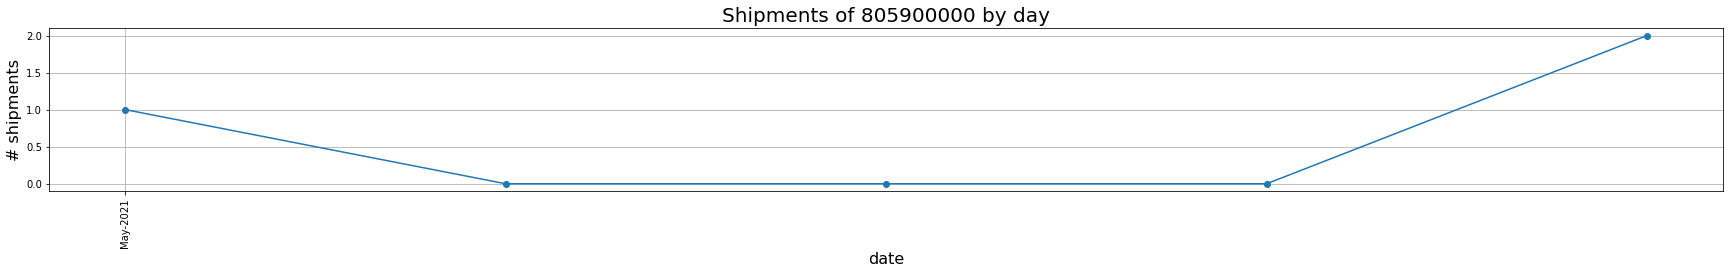

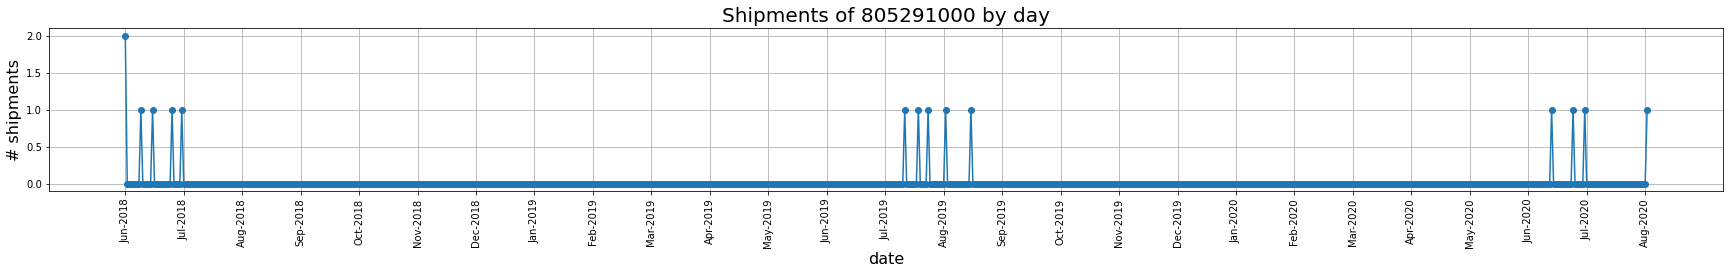

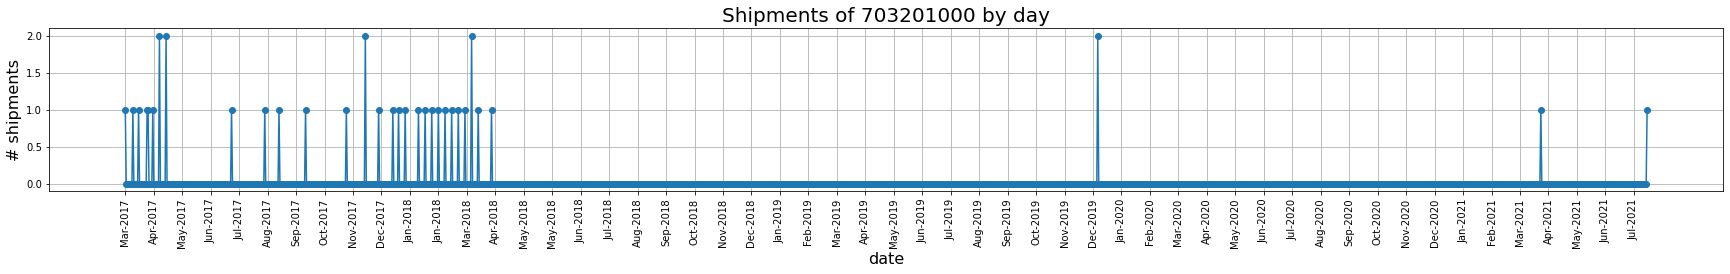

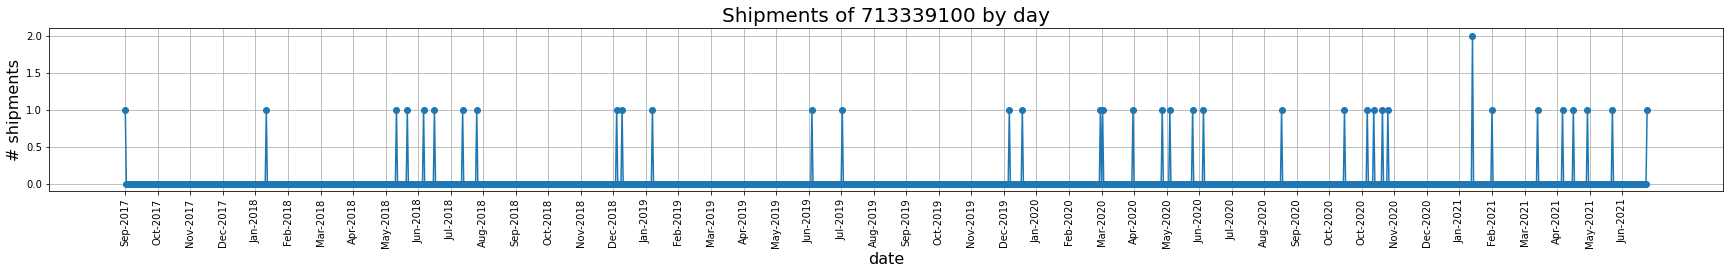

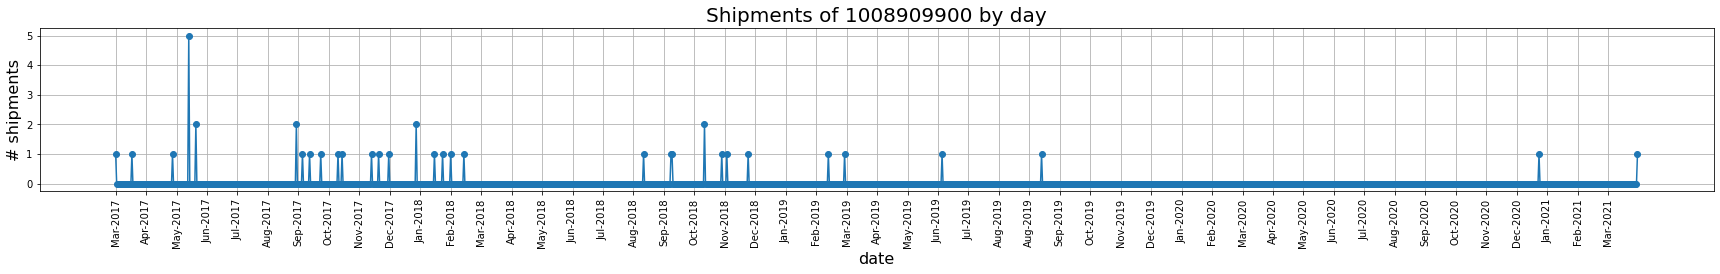

In [14]:
# Import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np


for i in range(0,len(populated_samples_dfs)-1):
    #----------------------------------------------------------------
    # GRAPH
    #----------------------------------------------------------------

    # size:
    plt.figure(figsize=(30,3))

    # title:
    plt.title('Shipments of '+ str(samples[i])+' by day', fontsize=20)

    # x axis:
    # x values
    x = range(0,len(populated_samples_dfs[i].index.date.tolist()))
    # x ticks
    my_xticks = populated_samples_dfs[i].index.date.tolist()
    for c in range(0, len(my_xticks)):
        my_xticks[c] = my_xticks[c].strftime('%h-%Y')
    plt.xticks(x[::30], my_xticks[::30], rotation='vertical')
    # # x label
    plt.xlabel("date", fontsize=16)

    # y axis:
    # y values
    y = populated_samples_dfs[i]["Count of exports"].tolist()
    # y ticks
    #plt.yticks(np.arange(populated_samples_dfs[i]["Count of exports"].min(), populated_samples_dfs[i]["Count of exports"].max()+1, 1))

    # y label
    plt.ylabel("# shipments", fontsize=16)

    # create plot
    plt.plot(x, y, marker='o')

    plt.grid()

    # show plot
    plt.show()

    #----------------------------------------------------------------

As we can see, some products (represented by its *Partida Aduanera* number) present a seasonal pattern (as expected) but others not.

#### **Remark 6**

The custom agents in Peru fill the columns of *Importador Extranjero*. Thus, we presume that there may be inconsistencies in the naming of the same company in different rows. Let's check this

We take as an example the *Importador Extranjero* value of "Comercial Agricola Montoliva Ltda.". Let's check the rows have a similar name (more than 90% similarity using Levenshtein Algorithm)

In [15]:
# Import Levenshtein
import Levenshtein

# Get the colum *Importador Extranjero*
df=pd.DataFrame(train, columns=['Importador Extranjero'])
# Add a column with the similarity magnitude according to Levenshtein Algorithm
df["Similarity"]=df.apply(lambda x: Levenshtein.ratio(x['Importador Extranjero'],  "Comercial Agricola Montoliva Ltda."), axis=1)
# Filter rows with more than 90% similarity
df.iloc[(df["Similarity"]>=0.90).values]


,Importador Extranjero,Similarity
4,Comercial Agricola Montoliva Ltda.,1.000000
157,Comercial Agricola Montoliva Ltda.,1.000000
162,Comercial Agricola Montoliva Ltda,0.985075
158,Comercial Agricola Montoliva Ltda.,1.000000


As seen, rows refering to the same company in the *Importador Extranjero* column, have slightly different values. This must be cleaned in the next section.

Let's check now for *Exportador en Peru*. We will use a random company as an example

In [16]:
# Get the colum *Importador Extranjero*
df=pd.DataFrame(train, columns=['Exportador en Perú'])
# Random company
company = df.sample()['Exportador en Perú'].values[0]
print("The company to be analyzed is: "+company)
# Add a column with the similarity magnitude according to Levenshtein Algorithm
df["Similarity"]=df.apply(lambda x: Levenshtein.ratio(x['Exportador en Perú'],  company), axis=1)
# Filter rows with more than 90% similarity
df.iloc[(df["Similarity"]>=0.9).values]

The company to be analyzed is: Mecainnova Sociedad Anonima Cerrada - Mecainnova S.A.C.


,Exportador en Perú,Similarity
620592,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
620386,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
592268,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
620617,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
620766,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
618495,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
620596,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
592269,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
620083,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0
591387,Mecainnova Sociedad Anonima Cerrada - Mecainno...,1.0


Check how many unique values are in each column:

In [17]:
df.iloc[(df["Similarity"]>=0.8).values].nunique()

Exportador en Perú    2
Similarity            2
dtype: int64

We know from Aurum that the column *Exportador en Perú* is filled from a dropdown menu. So, since it's not "typed" there are no inconsistencies. This is alligned with the results we are getting above regarding this column. As such, there is no need to clean this column.

#### **Remark 7:**

The column *Descripcion de la Partida Aduanera* gives general information about the asociated product code of *Partida aduanera*, while the column "Descripcion Comercial" contains more detailed information. Let's study this colums

In [18]:
# Select the three columns of interest
df = train[["Partida Aduanera", "Descripcion de la Partida Aduanera", "Descripcion Comercial"]]
# Get the cardinality of *Partida aduanera*
print("There are "+ str(len(df['Partida Aduanera'].unique()))+ " different codes of Partida Aduanera in total")
# Get the cardinality of *Descripcion de la Partida Aduanera*
print("There are "+ str(len(df['Descripcion de la Partida Aduanera'].unique()))+ " different values of Descripcion de la Partida Aduanera in total")
# Get the cardinality of *Partida aduanera*
print("There are "+ str(len(df['Descripcion Comercial'].unique()))+ " different values of Descripcion Comercial in total")


There are 209 different codes of Partida Aduanera in total
There are 191 different values of Descripcion de la Partida Aduanera in total
There are 84171 different values of Descripcion Comercial in total


## **4. Data Cleaning**

In this stage we will clean the data and specifically the columns that we will use in the model(s) in the next section. Of course, we don´t need to clean all the columns, since many of them are not relevant to label the rows. So, let's first determine the columns to be used and justify why

| COLUMN | USEFUL | JUSTIFICATION |
| --- | --- | --- |
| Partida Aduanera | NO | For each customs code there is one description in *Descripcion de la Partida Aduanera*. This last carries more information about the product. So, we won´t take this attribute and consider the next one. |
| Descripcion de la Partida Aduanera | **YES** | This is a general description about the product, so this carries valuable information for the labeling |
| Aduana | **YES** | Usually, the products are exported from the nearest ports. For example, an orange cultivated in the north of Peru is more likely to be exported from a port in the north of the country. So this can be insightful for our model. |
| DUA | NO | This is a random generated code associated with the shipping, it does not carry information that can be captured |
| Fecha | **YES** | Associating the date of shipping to a category is insightfull. As we saw, some products are exported in specific seasons of the year |
| Año | NO | Already included in the previous attribute |
| Cod. Tributario | **YES** | There is one tax code for each company. A company can be associated to specific groups of products. Since this attribute is already numerical, it is more convenient to use it instead of the company name.  |
| Exportador en Perú | NO | This information is already captured in the previous attribute |
| Importador Extranjero | **YES** | An importer abroad can be related to a group of products, so this attribute is insightfull |
| Kg Bruto | NO | See next attribute |
| Kg Neto | **YES** | The weight of the shipments is insightfull, but is highly variable among same products, so initially we won´t use this feature. However we will use it to calculate the price by kg, which is actually insightfull |
| Toneladas Netas | NO  | See previous attribute |
| Qty 1 | NO | Same as before |
| Und 1 | NO | Same as before |
| Qty 2 | NO | Same as before |
| Und 2 | NO | Same as before |
| U$ FOB Tot | **YES** | The cost of the shipment will be use to calulate the cost by kg of the product |
| Miles de USD Fob TOTAL | NO | It is just a repetition of the previous attribute |
| U$ FOB Und 1 | NO | |
| U$ FOB Und 2 | NO  |  |
| Pais de Destino | **YES** | The country were this products are beeing imported can be related to groups of products |
| Puerto de destino | NO | The previous attribute indirectly captures this information already |
| Último Puerto Embarque | NO | |
| Via | NO |  |
| Agente Portuario | NO |  |
| Agente de Aduana | NO  |  |
| Descripcion Comercial | **YES** | The comercial description also carries valuable information for the labeling |
| Descripcion1 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion2 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion3 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion4 | NO | Alredy captured in *Descripcion Comercial* |
| Descripcion5 | NO | Alredy captured in *Descripcion Comercial* |
| Naviera | NO |  |
| Agente Carga(Origen) | NO |  |
| Agente Carga(Destino) | NO |  |
| Canal | NO |  |
| Concatenar | NO |  |
| Categoría macro Aurum | **YES** | **LABEL** |
| Subcategoría inicial | **YES** | **LABEL** |
| Subcategoría Consolidada Aurum | NO |  |
| Categoría Consolidada Aurum | NO |  |

In [19]:
train_data = train[["Descripcion de la Partida Aduanera", "Aduana", "Fecha", "Cod. Tributario", "Importador Extranjero", "Kg Neto", "U$ FOB Tot", "Pais de Destino", "Descripcion Comercial", "Categoría macro Aurum", "Subcategoría inicial" ]]
train_data

,Descripcion de la Partida Aduanera,Aduana,Fecha,Cod. Tributario,Importador Extranjero,Kg Neto,U$ FOB Tot,Pais de Destino,Descripcion Comercial,Categoría macro Aurum,Subcategoría inicial
541490,UVAS FRESCAS,PAITA,1/24/2021,20100227542,No identificado,492.0,1200.0,Estados Unidos,UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COL...,Uva,Uvas Sugar Crisp
102488,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS",TUMBES,10/19/2020,20409444866,No identificado,30038.0,4506.0,Colombia,CEBOLLAS FRESCASEN SACOS DE 46 KGPARA SU COMER...,Cebolla,Cebolla Fresca
201853,"ESPARRAGOS, FRESCOS O REFRIGERADOS",AEREA DEL CALLAO,1/29/2019,20279143222,Consolidated Farms Inc Dba Crystal Valley Foods,919.6,3924.0,Estados Unidos,ESPARRAGOS FRESCOS CODIGO Nº13 RESTITUCION...,Espárrago,Espárrago Fresco
215653,"ESPARRAGOS, FRESCOS O REFRIGERADOS",AEREA DEL CALLAO,12/14/2020,20297939131,Alpine Fresh,1925.0,2098.0,Estados Unidos,ESPARRAGOS FRESCOS EN CAJAS DRAWBACK ESPARRA...,Espárrago,Espárrago Fresco
312016,LAS DEMÁS CLEMENTINAS,MARITIMA DEL CALLAO,8/5/2019,20501923428,No identificado,880.0,1346.0,Estados Unidos,MANDARINAS FRESCAS TANGO COLD TREATMENT EXPOR...,Mandarina,Mandarinas Frescas Tango
...,...,...,...,...,...,...,...,...,...,...,...
558088,UVAS FRESCAS,PISCO,12/21/2020,20602872760,Vanguard Direct. Llc5080 California Avenue. Su...,738.0,63.0,Estados Unidos,"UVAS FRESCAS,VARIEDAD: SWEET GLOBE,CONDICION: ...",Uva,Uvas Sweet Globe
124605,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS",TUMBES,4/1/2021,20606258535,No identificado,30038.0,8510.0,Colombia,CEBOLLA FRESCA ROJAEMBALADA EN SACOS(653 SACOS...,Cebolla,Cebolla Fresca Roja
544751,UVAS FRESCAS,PISCO,1/10/2019,20562740814,Masterfruits - Comercio De Frutas.,5608.8,5472.0,Portugal,UVAS FRESCAS EN CAJAS VARIEDAD SUGRAONE COLD T...,Uva,Uvas Sugraone
18638,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...,SALAVERRY,10/29/2019,20559912353,Natures Pride B.V.,10443.0,50062.0,Países Bajos,ARANDANO FRESCO EN CAJAS SE ACOGE AL DRAWBACK,Arándano,Arándanos Frescos Sin Variedad


From now on we will focus on each of the selected columns

#### **Descripcion de la Partida Aduanera (description of the customs code)**

In [20]:
train_data[["Descripcion de la Partida Aduanera"]]

,Descripcion de la Partida Aduanera
541490,UVAS FRESCAS
102488,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS"
201853,"ESPARRAGOS, FRESCOS O REFRIGERADOS"
215653,"ESPARRAGOS, FRESCOS O REFRIGERADOS"
312016,LAS DEMÁS CLEMENTINAS
...,...
558088,UVAS FRESCAS
124605,"CEBOLLAS Y CHALOTES, FRESCOS O REFRIGERADOS"
544751,UVAS FRESCAS
18638,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...


Since in this column we are dealing with textual descriptions of the product, we will use Natural Language Processing techniques. A first important step that we will perform is to remove the so called *stop words* from each cell, so that we get rid of the low-level information. For example, we see that the second row in the above table has the word 'Y' (and) or 'O' (or). This words should not be considered in our future model.

To do this we will use the Natural Language Toolkit (NLTK).

In [21]:
# Import the library
import nltk
# Download the stopwords feature
#nltk.download('stopwords')
# Import the stopwords
from nltk.corpus import stopwords

# Get the stopword in Spanish
sw_nltk = stopwords.words('spanish')
print("The words considered stopwords in spanish are: ")
print(sw_nltk)

The words considered stopwords in spanish are: 
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', '

Now let's remove the stopwords and punctuations from the column

In [22]:
# Create an array with the column values
old_descriptions = train_data["Descripcion de la Partida Aduanera"].tolist()

# Array to store cleaned values
new_descriptions = []

# Remove the stopwords from each old cell and populate the new array
for sentence in old_descriptions:
    # Remove stopwords
    words = [word for word in sentence.split() if word.lower() not in sw_nltk ]
    new_text = " ".join(words)
    # Additionally remove punctuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(new_text)
    new_text = " ".join(words)
    # Append to the array
    new_descriptions.append(new_text)
new_descriptions

# Add the cleaned data to the training dataframe
train_data["Descripcion de la Partida Aduanera"] = new_descriptions
train_data[["Descripcion de la Partida Aduanera"]]

C:\Users\spost\AppData\Local\Temp\ipykernel_22248\3163164256.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Descripcion de la Partida Aduanera"] = new_descriptions


,Descripcion de la Partida Aduanera
541490,UVAS FRESCAS
102488,CEBOLLAS CHALOTES FRESCOS REFRIGERADOS
201853,ESPARRAGOS FRESCOS REFRIGERADOS
215653,ESPARRAGOS FRESCOS REFRIGERADOS
312016,DEMÁS CLEMENTINAS
...,...
558088,UVAS FRESCAS
124605,CEBOLLAS CHALOTES FRESCOS REFRIGERADOS
544751,UVAS FRESCAS
18638,ARANDANOS MURTONES DEMAS FRUTOS GENERO VACCINI...


#### **Aduana (customs office name)**

In [23]:
train_data["Aduana"].unique()

array(['PAITA', 'TUMBES', 'AEREA DEL CALLAO', 'MARITIMA DEL CALLAO',
       'SALAVERRY', 'PISCO', 'PIMENTEL', 'TACNA', 'CHIMBOTE',
       'MOLLENDO - MATARANI', 'PUERTO MALDONADO', 'AREQUIPA',
       'DESAGUADERO', 'ILO', 'LA TINA'], dtype=object)

As we see there are no duplications by typos. This column is clean.

#### **Fecha (date)**

For this column we will map the month of shipment

In [24]:
import datetime as dt

date = train_data['Fecha'].tolist()
date = pd.to_datetime(date).month
train_data['Fecha'] = date
train_data['Fecha']

C:\Users\spost\AppData\Local\Temp\ipykernel_22248\734820030.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fecha'] = date


541490     1
102488    10
201853     1
215653    12
312016     8
          ..
558088    12
124605     4
544751     1
18638     10
297827     6
Name: Fecha, Length: 505115, dtype: int64

#### **Cod. Tributario (tax code from exporter company)**

In [25]:
train_data['Cod. Tributario'].isnull().values.any()

False

There are non NaN values, the data is clean

#### **Importador extranjero (company name of importer abroad)**

As we saw previously, there are cells in this column refering to the same company but have slightly different values. We will clean this. <br>
First, we will create a dictionary whose keys will be the first appearance of the companies in the column and the value will be an array with the all the different name variations of the respective company

In [26]:
# ONCE THE DICTIONARY IS CREATED AND SAVED IN A CSV FILE, WE WON´T NEED TO RUN THIS CELL AGAIN

""" # Import tqdm to see a progress bar
from tqdm import tqdm

# Get the column as a list
importer_abroad = train_data["Importador Extranjero"].tolist()
# Remove duplicates
importer_abroad = list(dict.fromkeys(importer_abroad))
# Print number of different strings in the array
print(len(importer_abroad))
# Create the dictionary 
importer_abroad_map = {}

for i,x in enumerate( tqdm(importer_abroad) ):
    # If the importer is already inside a map, discard it, if not, proceed
    if not(importer_abroad[i] in list(importer_abroad_map.values())):
        # Create a key and and an array map including the key's value
        importer_abroad_map[importer_abroad[i]] = [importer_abroad[i]]
        # Iterate from the next row to the end
        for c in range(i+1, len(importer_abroad)):
            # Check the similarity between the values
            similarity = Levenshtein.ratio(importer_abroad[i],importer_abroad[c])
            # If similarity is more than 90% add the value to the map
            if similarity>=0.9:
                importer_abroad_map[importer_abroad[i]].append(importer_abroad[c]) """

' # Import tqdm to see a progress bar\nfrom tqdm import tqdm\n\n# Get the column as a list\nimporter_abroad = train_data["Importador Extranjero"].tolist()\n# Remove duplicates\nimporter_abroad = list(dict.fromkeys(importer_abroad))\n# Print number of different strings in the array\nprint(len(importer_abroad))\n# Create the dictionary \nimporter_abroad_map = {}\n\nfor i,x in enumerate( tqdm(importer_abroad) ):\n    # If the importer is already inside a map, discard it, if not, proceed\n    if not(importer_abroad[i] in list(importer_abroad_map.values())):\n        # Create a key and and an array map including the key\'s value\n        importer_abroad_map[importer_abroad[i]] = [importer_abroad[i]]\n        # Iterate from the next row to the end\n        for c in range(i+1, len(importer_abroad)):\n            # Check the similarity between the values\n            similarity = Levenshtein.ratio(importer_abroad[i],importer_abroad[c])\n            # If similarity is more than 90% add the valu

Save the created dictionary locally

In [27]:
# ONCE THE DICTIONARY IS CREATED AND SAVED IN A CSV FILE, WE WON´T NEED TO RUN THIS CELL AGAIN

""" map_csv = pd.DataFrame(columns = ['company_name', 'company_name_alternatives'])
map_csv['company_name'] = list(importer_abroad_map.keys())
map_csv['company_name_alternatives'] = list(importer_abroad_map.values())
map_csv.to_csv('../data/importers_abroad_names_dictionary.csv', index=False)   """

" map_csv = pd.DataFrame(columns = ['company_name', 'company_name_alternatives'])\nmap_csv['company_name'] = list(importer_abroad_map.keys())\nmap_csv['company_name_alternatives'] = list(importer_abroad_map.values())\nmap_csv.to_csv('../data/importers_abroad_names_dictionary.csv', index=False)   "

Get the saved dictionary in the csv file into a dictionary in python

In [28]:
from ast import literal_eval

# Import the file
temp = pd.read_csv("../data/importers_abroad_names_dictionary.csv")
# Create the dictionary
importer_abroad_map = dict(zip(temp['company_name'].tolist(), temp['company_name_alternatives'].tolist()))
# Transform the values to arrays (as they are imported as strings)
for key, value in importer_abroad_map.items():
    importer_abroad_map[key] = literal_eval(value)
len(importer_abroad_map)

35324

Now clean the column by maping the values to the keys

In [29]:
from tqdm import tqdm

# Get the old importer abroad colum
old_importer_abroad = train_data["Importador Extranjero"].tolist()
# Create a list to store 
new_importer_abroad = []
for importer in tqdm(old_importer_abroad):
    for key, value in importer_abroad_map.items():
        if importer in value:
            new_importer_abroad.append(key)
            break


100%|██████████| 505115/505115 [04:15<00:00, 1974.77it/s]


In [30]:
train_data["Importador Extranjero"] = new_importer_abroad

C:\Users\spost\AppData\Local\Temp\ipykernel_22248\3532579991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Importador Extranjero"] = new_importer_abroad


#### **Kg Neto (net weight in of good KG) and U$ FOB Tot (total price of good)**

As we said before, here we will get the price by kg of the good. To do this we will use both columns and transform them into one.

In [31]:
# First, drop rows were weight is 0
print("From "+ str(len(train_data)) + " rows there are "+str(len(train_data[train_data['Kg Neto']==0]))+" with weight = 0")
train_data.drop(train_data[train_data["Kg Neto"] == 0].index, inplace=True)

# Then divide the price over weight
weight = train_data['Kg Neto'].tolist()
price = train_data['U$ FOB Tot'].tolist()
price_by_kg = np.divide(price, weight)

# Drop the used columns
train_data.drop(columns=["Kg Neto", "U$ FOB Tot"], inplace=True)

# Add the new column and name it usd_kg
train_data["usd_kg"]=price_by_kg

From 505115 rows there are 46 with weight = 0


C:\Users\spost\AppData\Local\Temp\ipykernel_22248\585616846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(train_data[train_data["Kg Neto"] == 0].index, inplace=True)
C:\Users\spost\AppData\Local\Temp\ipykernel_22248\585616846.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=["Kg Neto", "U$ FOB Tot"], inplace=True)
C:\Users\spost\AppData\Local\Temp\ipykernel_22248\585616846.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

#### **País de destino (country of destiny)**

In [33]:
countries = train_data["Pais de Destino"].unique()
countries.sort()
countries

array(['Aguas Internacionales', 'Albania', 'Alemania', 'Arabia Saudita',
       'Argelia', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas',
       'Bahréin', 'Barbados', 'Bielorrusia', 'Bolivia',
       'Bosnia Y Herzegovina', 'Brasil', 'Bulgaria', 'Bélgica',
       'Cabo Verde', 'Camboya', 'Camerún', 'Canadá', 'Chile', 'China',
       'Chipre', 'Colombia', 'Corea Del Norte', 'Corea Del Sur',
       'Costa De Marfil', 'Costa Rica', 'Croacia', 'Cuba', 'Curazao',
       'Dinamarca', 'Ecuador', 'Egipto', 'El Salvador',
       'Emiratos Árabes Unidos', 'Eslovenia', 'España', 'Estados Unidos',
       'Estonia', 'Federación Rusa', 'Filipinas', 'Finlandia', 'Francia',
       'Gabón', 'Georgia', 'Ghana', 'Grecia', 'Groenlandia', 'Guadalupe',
       'Guatemala', 'Guayana Francesa', 'Haití', 'Honduras', 'Hong Kong',
       'Hungría', 'India', 'Indonesia', 'Irak', 'Irlanda',
       'Irán (República Islámica De)',
       'Islas Ultramarinas Menores De Estados Unidos', 'Israel', 'Italia',
 

The column is correct, there is no need to clean it.

#### **Descripcion Comercial (comercial description)**

As it will be shown below, there are values in this columns with repeated sentences inside

In [34]:
comercial_description = train_data["Descripcion Comercial"].tolist()
comercial_description[0]

'UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN UVAS FRESCAS EN CAJAS VARIEDAD: IFG ELEVEN COLD TREATMEN'

Let's clean this and more issues

In [66]:
import re
import unidecode


# Function to remove repeated sentences inside a same string
def get_unrepeated_string(source: str) -> str:
    return re.match(r'^\s*([\w\s!"#$%&\'()*+,-./:;<=>?@{|}~º°«»\[\]§y¨`¦´¤¿]+?)(?:\s*\1)*\s*$', source)[1]

new_comercial_description = []

for description in tqdm(comercial_description):
    # First remove all accents
    new_description = unidecode.unidecode(description)
    # Remove two or more consecutive spaces and set one
    new_description= ' '.join(new_description.split())
    # Remove stopwords
    words = [word for word in new_description.split() if word.lower() not in sw_nltk ]
    new_description = " ".join(words)
    # Additionally remove punctuations
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(new_description)
    new_description = " ".join(words)
    # Then remove the duplicated sentences
    try:
        new_comercial_description.append(get_unrepeated_string(new_description))
    except:
        print(new_description)

train_data["Descripcion Comercial"] = new_comercial_description
new_comercial_description[0]

100%|██████████| 505069/505069 [00:50<00:00, 9984.42it/s] 
C:\Users\spost\AppData\Local\Temp\ipykernel_22248\4264741136.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Descripcion Comercial"] = new_comercial_description


'UVAS FRESCAS CAJAS VARIEDAD IFG ELEVEN COLD TREATMEN'

#### **Categoría macro Aurum (categories) and Subcategoría inicial (subcategories)**

This are the columns to predict

In [67]:
train_data

,Descripcion de la Partida Aduanera,Aduana,Fecha,Cod. Tributario,Importador Extranjero,Pais de Destino,Descripcion Comercial,Categoría macro Aurum,Subcategoría inicial,usd_kg
541490,UVAS FRESCAS,PAITA,1,20100227542,No identificado,Estados Unidos,UVAS FRESCAS CAJAS VARIEDAD IFG ELEVEN COLD TR...,Uva,Uvas Sugar Crisp,2.439024
102488,CEBOLLAS CHALOTES FRESCOS REFRIGERADOS,TUMBES,10,20409444866,No identificado,Colombia,CEBOLLAS FRESCASEN SACOS 46 KGPARA COMERCIALIZ...,Cebolla,Cebolla Fresca,0.150010
201853,ESPARRAGOS FRESCOS REFRIGERADOS,AEREA DEL CALLAO,1,20279143222,Consolidated Farms Inc Dba Crystal Valley Foods,Estados Unidos,ESPARRAGOS FRESCOS CODIGO No13 RESTITUCION DER...,Espárrago,Espárrago Fresco,4.267073
215653,ESPARRAGOS FRESCOS REFRIGERADOS,AEREA DEL CALLAO,12,20297939131,Alpine Fresh,Estados Unidos,ESPARRAGOS FRESCOS CAJAS DRAWBACK,Espárrago,Espárrago Fresco,1.089870
312016,DEMÁS CLEMENTINAS,MARITIMA DEL CALLAO,8,20501923428,No identificado,Estados Unidos,MANDARINAS FRESCAS TANGO COLD TREATMENT EXPORT...,Mandarina,Mandarinas Frescas Tango,1.529545
...,...,...,...,...,...,...,...,...,...,...
558088,UVAS FRESCAS,PISCO,12,20602872760,Vanguard Direct Llc5080 California Avenue. Sui...,Estados Unidos,UVAS FRESCAS VARIEDAD SWEET GLOBE CONDICION CO...,Uva,Uvas Sweet Globe,0.085366
124605,CEBOLLAS CHALOTES FRESCOS REFRIGERADOS,TUMBES,4,20606258535,No identificado,Colombia,CEBOLLA FRESCA ROJAEMBALADA SACOS 653 SACOS 46...,Cebolla,Cebolla Fresca Roja,0.283308
544751,UVAS FRESCAS,PISCO,1,20562740814,Masterfruits - Comercio De Frutas.,Portugal,UVAS FRESCAS CAJAS VARIEDAD SUGRAONE COLD TREA...,Uva,Uvas Sugraone,0.975610
18638,ARANDANOS MURTONES DEMAS FRUTOS GENERO VACCINI...,SALAVERRY,10,20559912353,Natures Pride B.V.,Países Bajos,ARANDANO FRESCO CAJAS ACOGE DRAWBACK,Arándano,Arándanos Frescos Sin Variedad,4.793833


## **5. Data Preprocessing**

In this stage we will preprocess the data to be used in a classification model. As seen in the table below, we are dealing with a Multi-Class Text Classification problem, since we have may columns including strings. 